In [1]:

import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator
import pandas as pd
from googletrans import Translator, LANGUAGES, LANGCODES
from glob import glob
from wordcloud import WordCloud, STOPWORDS 
 #from py_translator import Translator
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['axes.linewidth']=5
plt.rcParams['xtick.major.size'] =15
plt.rcParams['ytick.major.size'] =15
plt.rcParams['xtick.minor.size'] =10
plt.rcParams['ytick.minor.size'] =10
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5
mpl.rcParams['axes.titlepad'] = 10

plt.rcParams['font.size']=40
plt.rcParams['figure.figsize']=(12,16)



In [2]:
translator = Translator()


In [4]:
val = translator.translate('agujero negro')
val.text

AttributeError: 'NoneType' object has no attribute 'group'

# utils functions

In [12]:
def make_worldcloud(stopwords,df, language='Spanish'):
    stopwords = set(stopwords) # iterate through the csv file 
    comment_words = ''
    for val in df[~df['What did you learn today?'].isna()]['What did you learn today?']:
        try:
            if language!='Spanish':
                print(val)
                val = translator.translate(val)
                val = val.text

            tokens = val.split()     # Converts each token into lowercase 
            for i in range(len(tokens)): 
                tokens[i] = tokens[i].lower()   

            comment_words += " ".join(tokens)+" "
        except:
            print('FLAG')
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10,colormap='jet').generate(comment_words) # plot the WordCloud image  
    return wordcloud

# stopwords

In [7]:
stopwords = np.loadtxt('stop_words_spanish.txt', dtype=str) # iterate through the csv file 
more_stopwords = ['cae','siguen','nisiquiera','forman','podcast','tu','tardaría','tuve','sucesos','to','pasaría','escuchando','habría','decían','acerca','nuevamente',
                 'tardaria','habria','decian','mas','persona','nan','agujeros','negros'] 
stopwords_spanish = np.append(stopwords, more_stopwords)

# Artists

## in spanish

In [164]:
artists = pd.read_csv('Artistas_astroarteagujero - Form responses 1.csv')

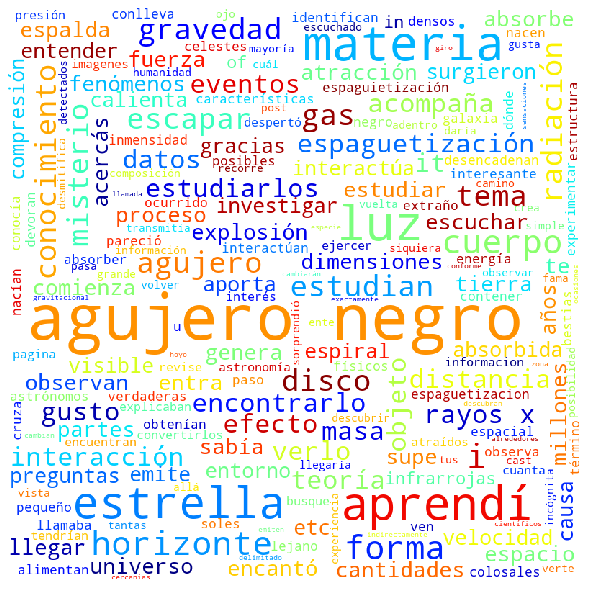

In [158]:
wordcloud = make_worldcloud(stopwords,artists,language='Spanish')                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

## In english  #not working for some reason

In [174]:
wordcloud = make_worldcloud(df=artists,language='English',stopwords=STOPWORDS)                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)                      


Aprendí que no se ven los agujeros negros, pero se observa como interactúan con su alrededor, eso me pareció muy interesante.


AttributeError: 'NoneType' object has no attribute 'group'

# students

In [10]:
students = pd.read_csv('Estudiantes_astroarteagujeros - Form responses 1.csv')

Text(0.5, 1, 'What did you learn today?')

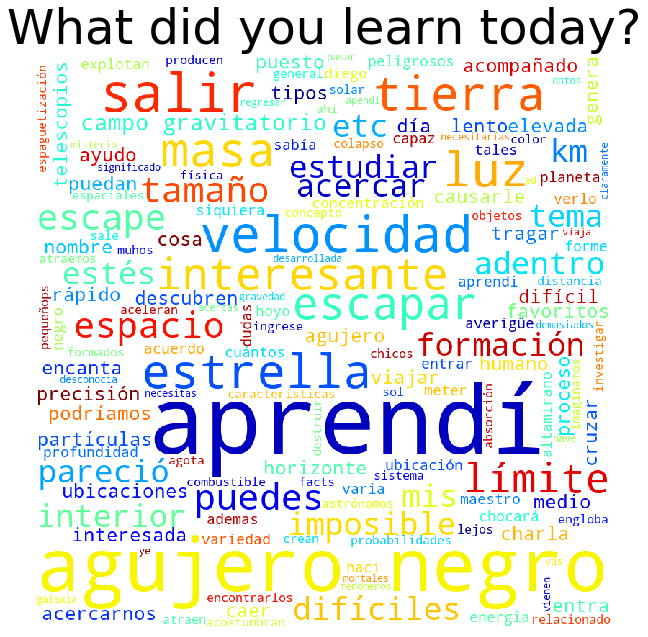

In [14]:
wordcloud = make_worldcloud(df=students,language='Spanish',stopwords=stopwords_spanish)                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)        
plt.title('What did you learn today?')